In [28]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from tensorflow import keras
import cv2
import numpy as np
from matplotlib import pyplot as plt

tf.test.gpu_device_name()

'/device:GPU:0'

In [29]:
data_dir = r'data'
os.listdir(data_dir)
# os.listdir(os.path.join(data_dir, 'crazing'))

['crazing', 'inclusion', 'patches', 'scratches']

In [30]:
data = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                   image_size=(100, 100),
                                                   batch_size=32)
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

Found 960 files belonging to 4 classes.


In [31]:
batch = data_iterator.next()

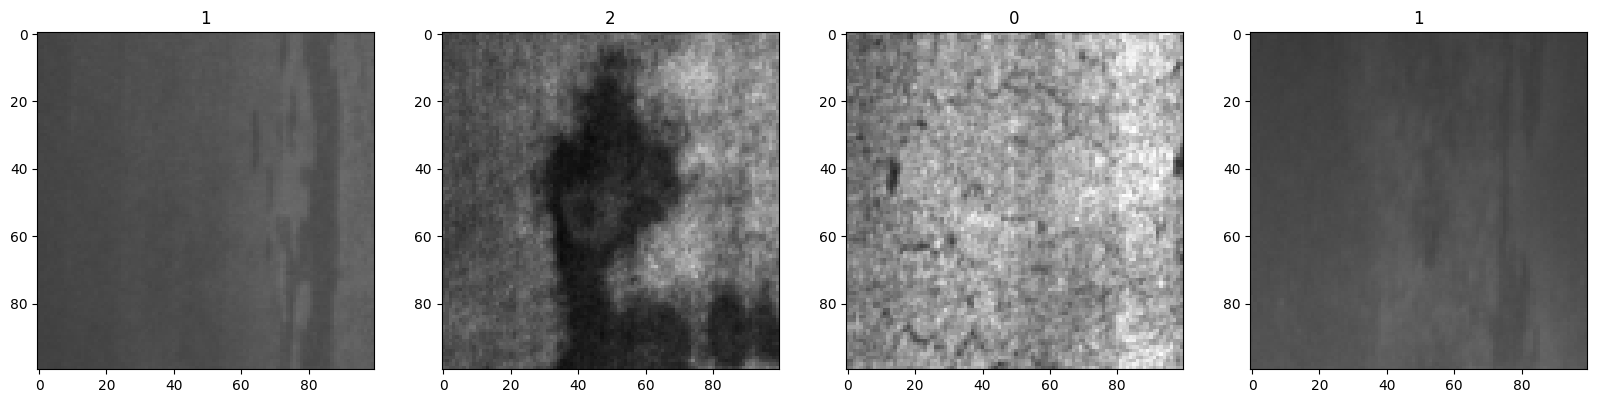

In [32]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Preprocessing

In [33]:
# SCALE DATA
data = data.map(lambda x, y: (x/255.0, y))

In [34]:
scaled_interator = data.as_numpy_iterator()

In [35]:
## SPLIT DATA

train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [36]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Building the Model

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers 
from tensorflow.keras.optimizers import Adam

In [38]:
model = Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(100, 100, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') 
])

In [39]:
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer,
              loss=tf.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [40]:
# model.summary()
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='logs')

Train

In [41]:
hist = model.fit(train, epochs=15, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/15
21/21 [==============================] - 2s 41ms/step - loss: 1.3963 - accuracy: 0.2991 - val_loss: 1.0104 - val_accuracy: 0.5000
Epoch 2/15
21/21 [==============================] - 1s 31ms/step - loss: 0.7584 - accuracy: 0.7202 - val_loss: 0.6072 - val_accuracy: 0.7656
Epoch 3/15
21/21 [==============================] - 1s 33ms/step - loss: 0.5741 - accuracy: 0.7515 - val_loss: 0.4441 - val_accuracy: 0.8594
Epoch 4/15
21/21 [==============================] - 1s 30ms/step - loss: 0.4257 - accuracy: 0.8348 - val_loss: 0.4130 - val_accuracy: 0.8177
Epoch 5/15
21/21 [==============================] - 1s 32ms/step - loss: 0.4522 - accuracy: 0.8170 - val_loss: 0.4295 - val_accuracy: 0.8281
Epoch 6/15
21/21 [==============================] - 1s 30ms/step - loss: 0.3397 - accuracy: 0.8601 - val_loss: 0.3632 - val_accuracy: 0.8594
Epoch 7/15
21/21 [==============================] - 1s 30ms/step - loss: 0.2733 - accuracy: 0.9003 - val_loss: 0.2582 - val_accuracy: 0.8906
Epoch 8/15
21

Plot Performance

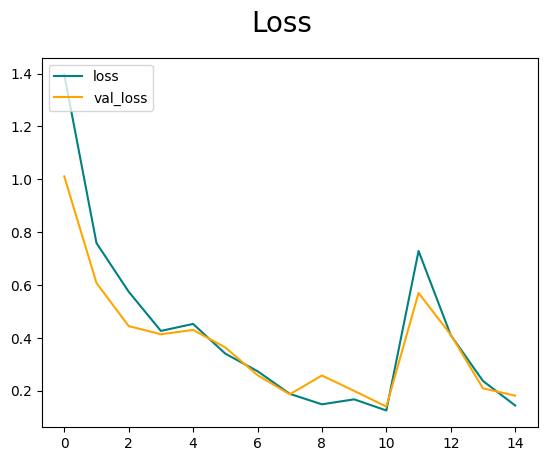

In [42]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

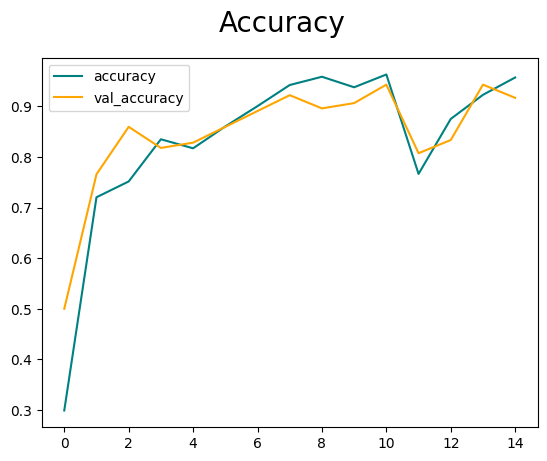

In [43]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Evaluate